<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 3 - Data Visualization</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

## Introduction

In this assignment we will work on [Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data) datset.This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

# **Note: For volume of the notebook, I will not run the plotly and bokeh cells but I make them ready to run in your local.**

## Loading the Dataset

I can load and read the .csv file but I want to load the dataset from kaggle.

In [20]:
# First, let's import the libraries we'll need later
import pandas as pd
import os
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import plotly.express as px
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Category10
from math import pi
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import jitter
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
%matplotlib inline
sns.set(color_codes=True)

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [23]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [24]:
!kaggle datasets download -d jessemostipak/hotel-booking-demand

Dataset URL: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
License(s): Attribution 4.0 International (CC BY 4.0)
hotel-booking-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
!unzip \*.zipy

unzip:  cannot find or open *.zipy, *.zipy.zip or *.zipy.ZIP.

No zipfiles found.


In [26]:
df = pd.read_csv('hotel_bookings.csv')

The goal of the assignment is working on visualisation. So, we just do a little EDA and data cleaning.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [29]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [30]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [31]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [32]:
df.duplicated().sum()

31994

In [33]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

0

In [36]:
df.shape

(87396, 32)

Pie Charts

Pie charts are great tools to show us the composition of data. If done right, we get a nice picture of contributing factors to our data source in a glance.

In [37]:
# fig = px.pie(df, names='hotel', title='Distribution of Hotel Types')
# fig.show()

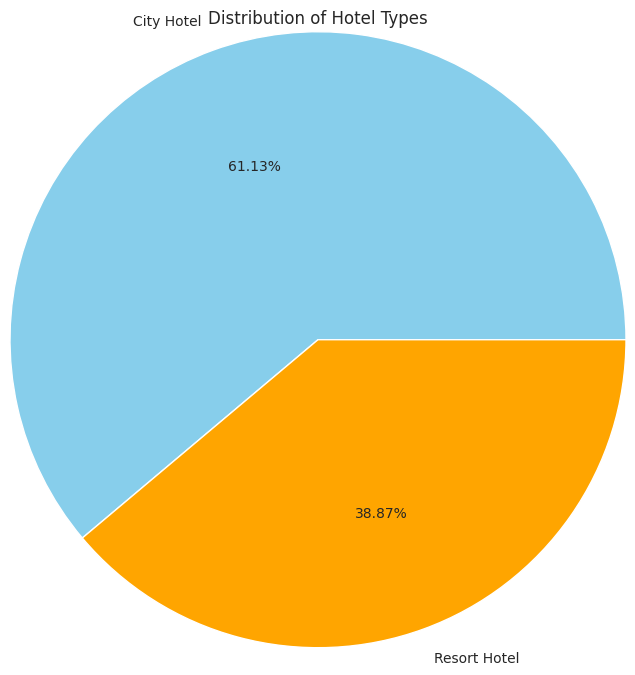

In [38]:
df['hotel'].value_counts().plot(kind='pie', figsize=(16,8), autopct='%1.2f%%', ylabel='', radius=1.25, fontsize=10, colors=['skyblue', 'orange'])
plt.title('Distribution of Hotel Types')
plt.ylabel('')
plt.show()

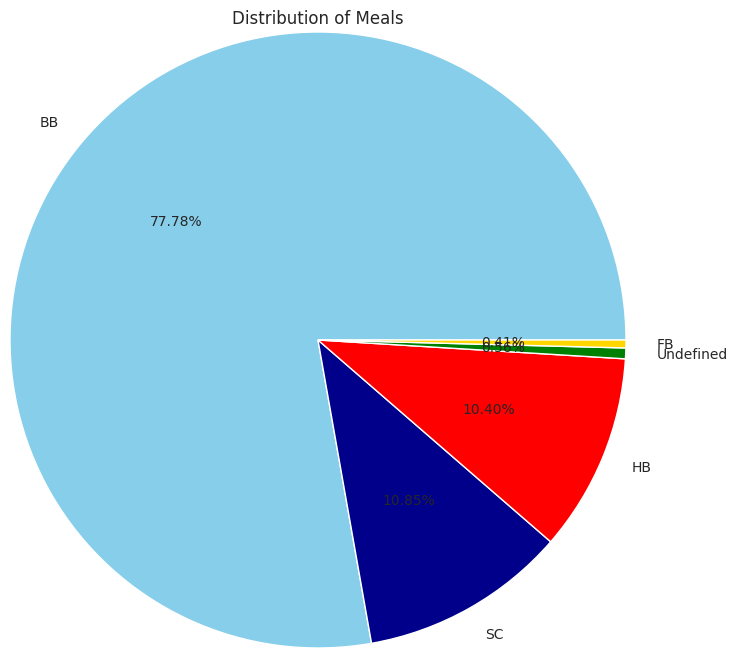

In [39]:
df['meal'].value_counts().plot(kind='pie', figsize=(16,8), autopct='%1.2f%%', ylabel='', radius=1.25, fontsize=10, colors=['skyblue', 'darkblue', 'red', 'green', 'gold'])
plt.title('Distribution of Meals')
plt.ylabel('')
plt.show()

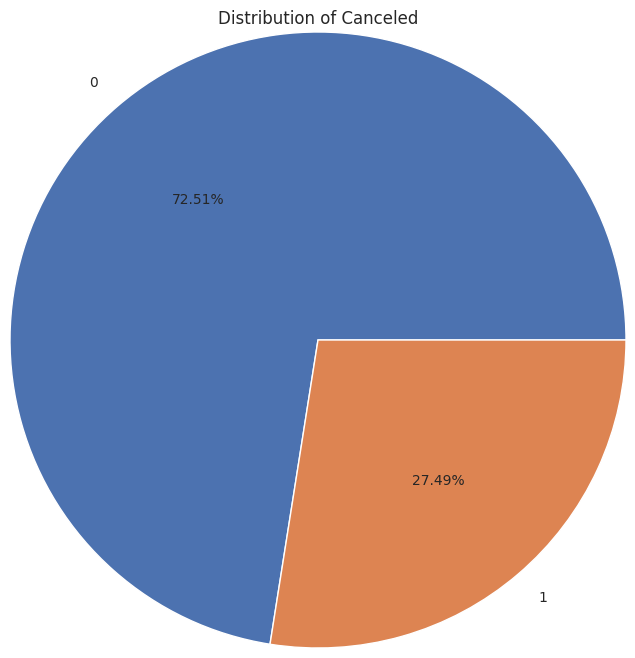

In [40]:
df['is_canceled'].value_counts().plot(kind='pie', figsize=(16,8), autopct='%1.2f%%', ylabel='', radius=1.25, fontsize=10)
plt.title('Distribution of Canceled')
plt.ylabel('')
plt.show()

Box Plot:

Box plots are another way of showing the distribution of a single variable.

The box extends from the 1st to 3rd quantiles of the data and the line in the middle corresponds to the median (Q2). The "whiskers" extend out of the box to no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval.

Outliers are plotted as separate dots.

In [113]:
fig = px.box(df, x='hotel', y='lead_time', title='Lead Time by Hotel Type', color='hotel')
fig.show()

<ipython-input-42-c36db48763de>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




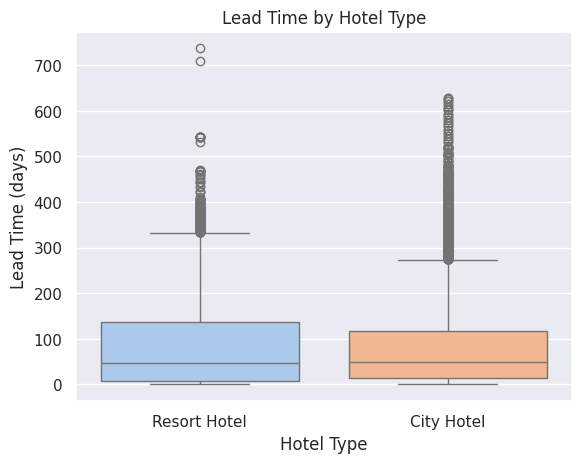

In [42]:
sns.boxplot(x='hotel', y='lead_time', data=df, palette='pastel')
plt.title('Lead Time by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time (days)')
plt.show()

<ipython-input-43-5ec59f762c2e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




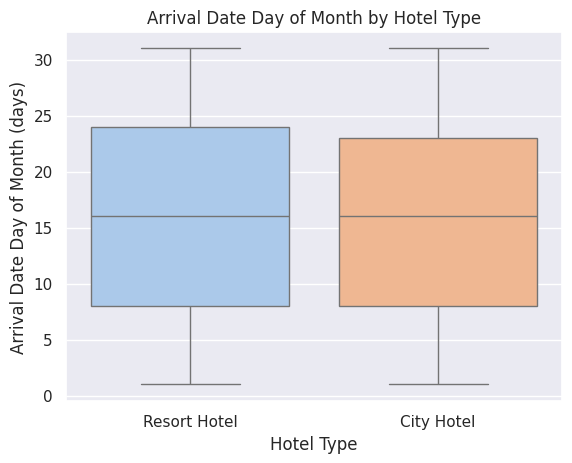

In [43]:
sns.boxplot(x='hotel', y='arrival_date_day_of_month', data=df, palette='pastel')
plt.title('Arrival Date Day of Month by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Arrival Date Day of Month (days)')
plt.show()

Line Charts:

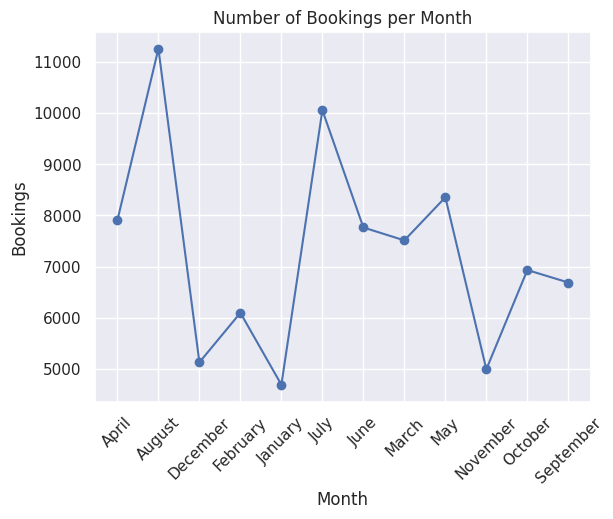

In [44]:
monthly_bookings = df.groupby('arrival_date_month')['is_canceled'].count()

plt.plot(monthly_bookings.index, monthly_bookings.values, marker='o', linestyle='-')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Stacked (Multiple) Line Charts:

In [112]:
monthly_data = df.groupby(['arrival_date_month', 'hotel'])['is_canceled'].count().reset_index()
monthly_data.columns = ['Month', 'Hotel', 'Bookings']

# Stacked line chart for number of bookings per month by hotel type
fig = px.line(monthly_data, x='Month', y='Bookings', color='Hotel', title='Number of Bookings per Month by Hotel Type')
fig.show()

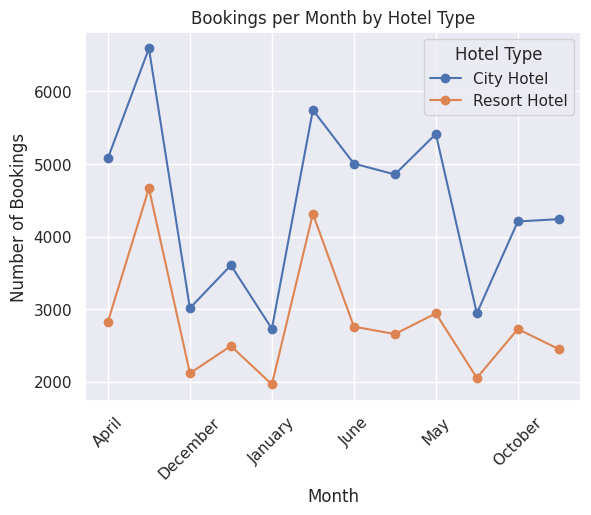

In [46]:
monthly_data = df.groupby(['arrival_date_month', 'hotel'])['is_canceled'].count().unstack()
monthly_data.plot(kind='line', marker='o')
plt.title('Bookings per Month by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.grid(True)
plt.show()

Bar Chart:

Bar charts are good for illustrating trends as well, or compare different metrics together.

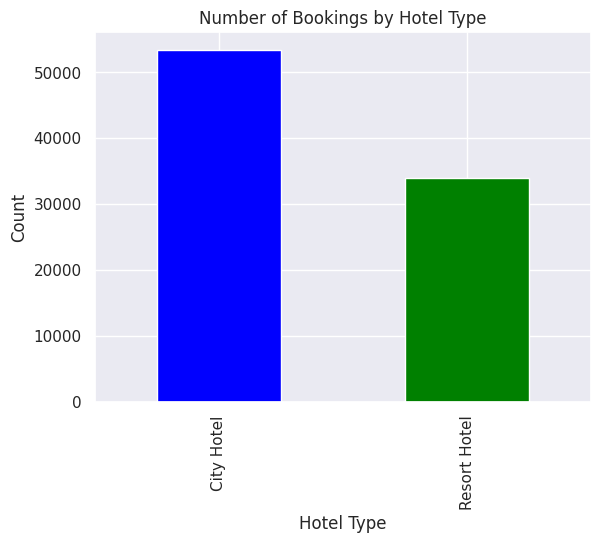

In [47]:
df['hotel'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

Multiple Bar Chart:

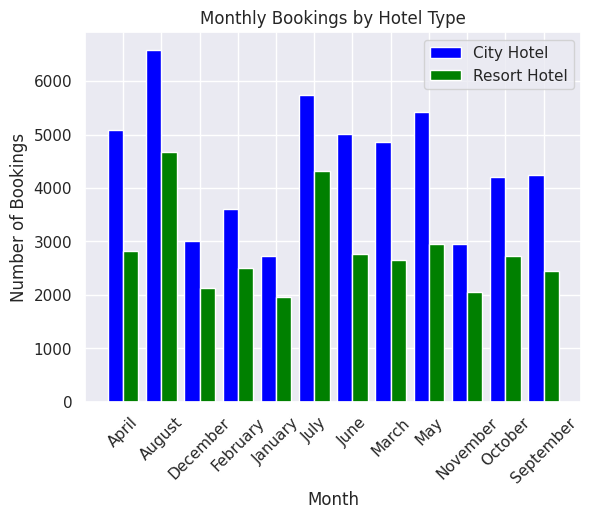

In [48]:
monthly_data = df.groupby(['arrival_date_month', 'hotel'])['is_canceled'].count().unstack()
months = np.arange(len(monthly_data))

plt.bar(months - 0.2, monthly_data['City Hotel'], width=0.4, label='City Hotel', color='blue')
plt.bar(months + 0.2, monthly_data['Resort Hotel'], width=0.4, label='Resort Hotel', color='green')

plt.xticks(months, monthly_data.index, rotation=45)
plt.title('Monthly Bookings by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend()
plt.show()

Stacked Bar Charts

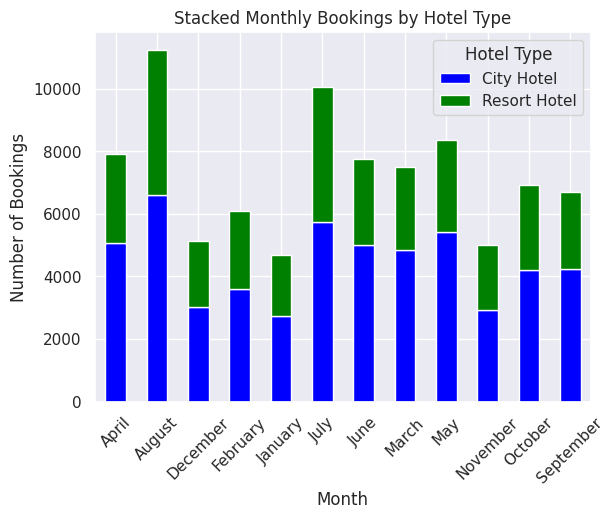

In [49]:
monthly_data.plot(kind='bar', stacked=True, color=['blue', 'green'])
plt.title('Stacked Monthly Bookings by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.show()

Scatter Plots:

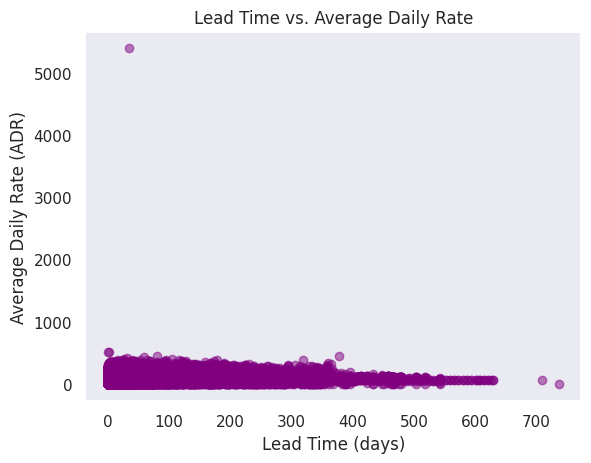

In [50]:
plt.scatter(df['lead_time'], df['adr'], alpha=0.5, c='purple')
plt.title('Lead Time vs. Average Daily Rate')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid()
plt.show()

Bubble Charts

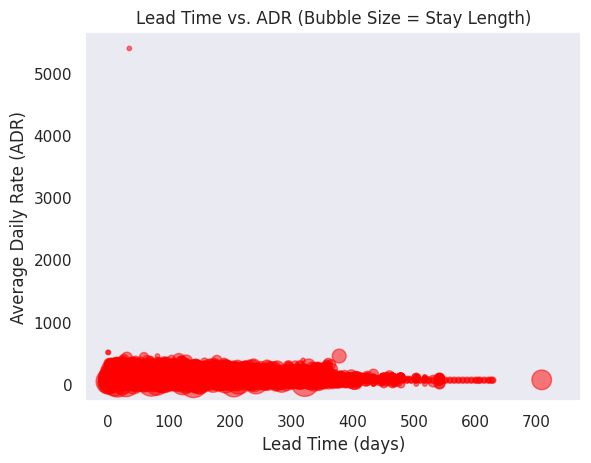

In [51]:
plt.scatter(df['lead_time'], df['adr'], s=df['stays_in_week_nights']*10, alpha=0.5, c='red')
plt.title('Lead Time vs. ADR (Bubble Size = Stay Length)')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid()
plt.show()

Error Bar:

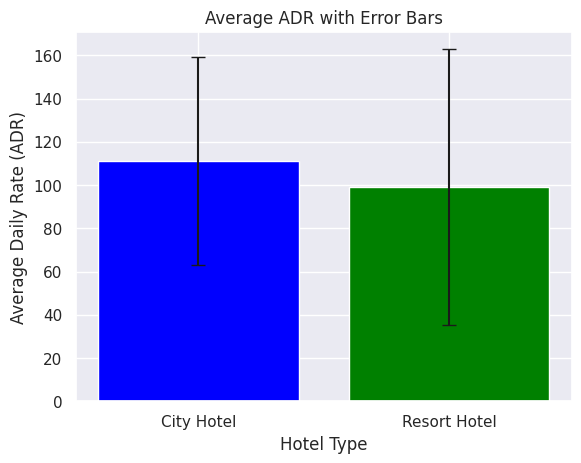

In [52]:
import numpy as np

mean_adr = df.groupby('hotel')['adr'].mean()
std_adr = df.groupby('hotel')['adr'].std()

plt.bar(mean_adr.index, mean_adr.values, yerr=std_adr.values, capsize=5, color=['blue', 'green'])
plt.title('Average ADR with Error Bars')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

Bokeh:

In [111]:
from bokeh.io import output_notebook

output_notebook()

# Load dataset
df = pd.read_csv('hotel_bookings.csv')

# Data preparation
df['jittered_hotel'] = df['hotel'].apply(lambda x: 0 if x == 'City Hotel' else 1)
source = ColumnDataSource(df)

# Plot
p = figure(title="Lead Time by Hotel Type",
           x_range=(-0.5, 1.5),
           y_range=(0, df['lead_time'].max() + 10),
           tools="")

p.circle(x=jitter('jittered_hotel', width=0.3, range=p.x_range),
         y='lead_time',
         source=source,
         alpha=0.3,
         size=5)

p.xaxis.major_label_overrides = {0: 'City Hotel', 1: 'Resort Hotel'}
p.xaxis.axis_label = 'Hotel Type'
p.yaxis.axis_label = 'Lead Time'

show(p)

In [110]:
# Data preparation
monthly_data = df.groupby('arrival_date_month')['is_canceled'].count().reset_index()
monthly_data.columns = ['Month', 'Bookings']

# Plot
p = figure(title="Number of Bookings per Month", x_range=monthly_data['Month'].tolist(), y_range=(0, monthly_data['Bookings'].max() + 100))
p.line(x='Month', y='Bookings', source=monthly_data, line_width=2)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Number of Bookings'
show(p)

Plotly:

In [109]:
# Data preparation
monthly_data = df.groupby('arrival_date_month')['is_canceled'].count().reset_index()
# monthly_data.columns = ['Month', 'Bookings']

# Line chart for number of bookings per month
fig = px.line(monthly_data, x='arrival_date_month', y='is_canceled', title='Number of Bookings per Month')
fig.show()

In [108]:
# Data preparation
monthly_data = df.groupby(['arrival_date_month', 'hotel'])['is_canceled'].count().reset_index()
monthly_data.columns = ['Month', 'Hotel', 'Bookings']

# Stacked line chart for number of bookings per month by hotel type
fig = px.line(monthly_data, x='Month', y='Bookings', color='Hotel', title='Number of Bookings per Month by Hotel Type')
fig.show()

Now, some compound practices and visualizations on this datasets:

<ipython-input-60-4331fa713779>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-60-4331fa713779>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-60-4331fa713779>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

12 ValueError
13 ValueError
14 ValueError
15 ValueError
16 ValueError
17 ValueError
18 ValueError
19 ValueError
20 ValueError


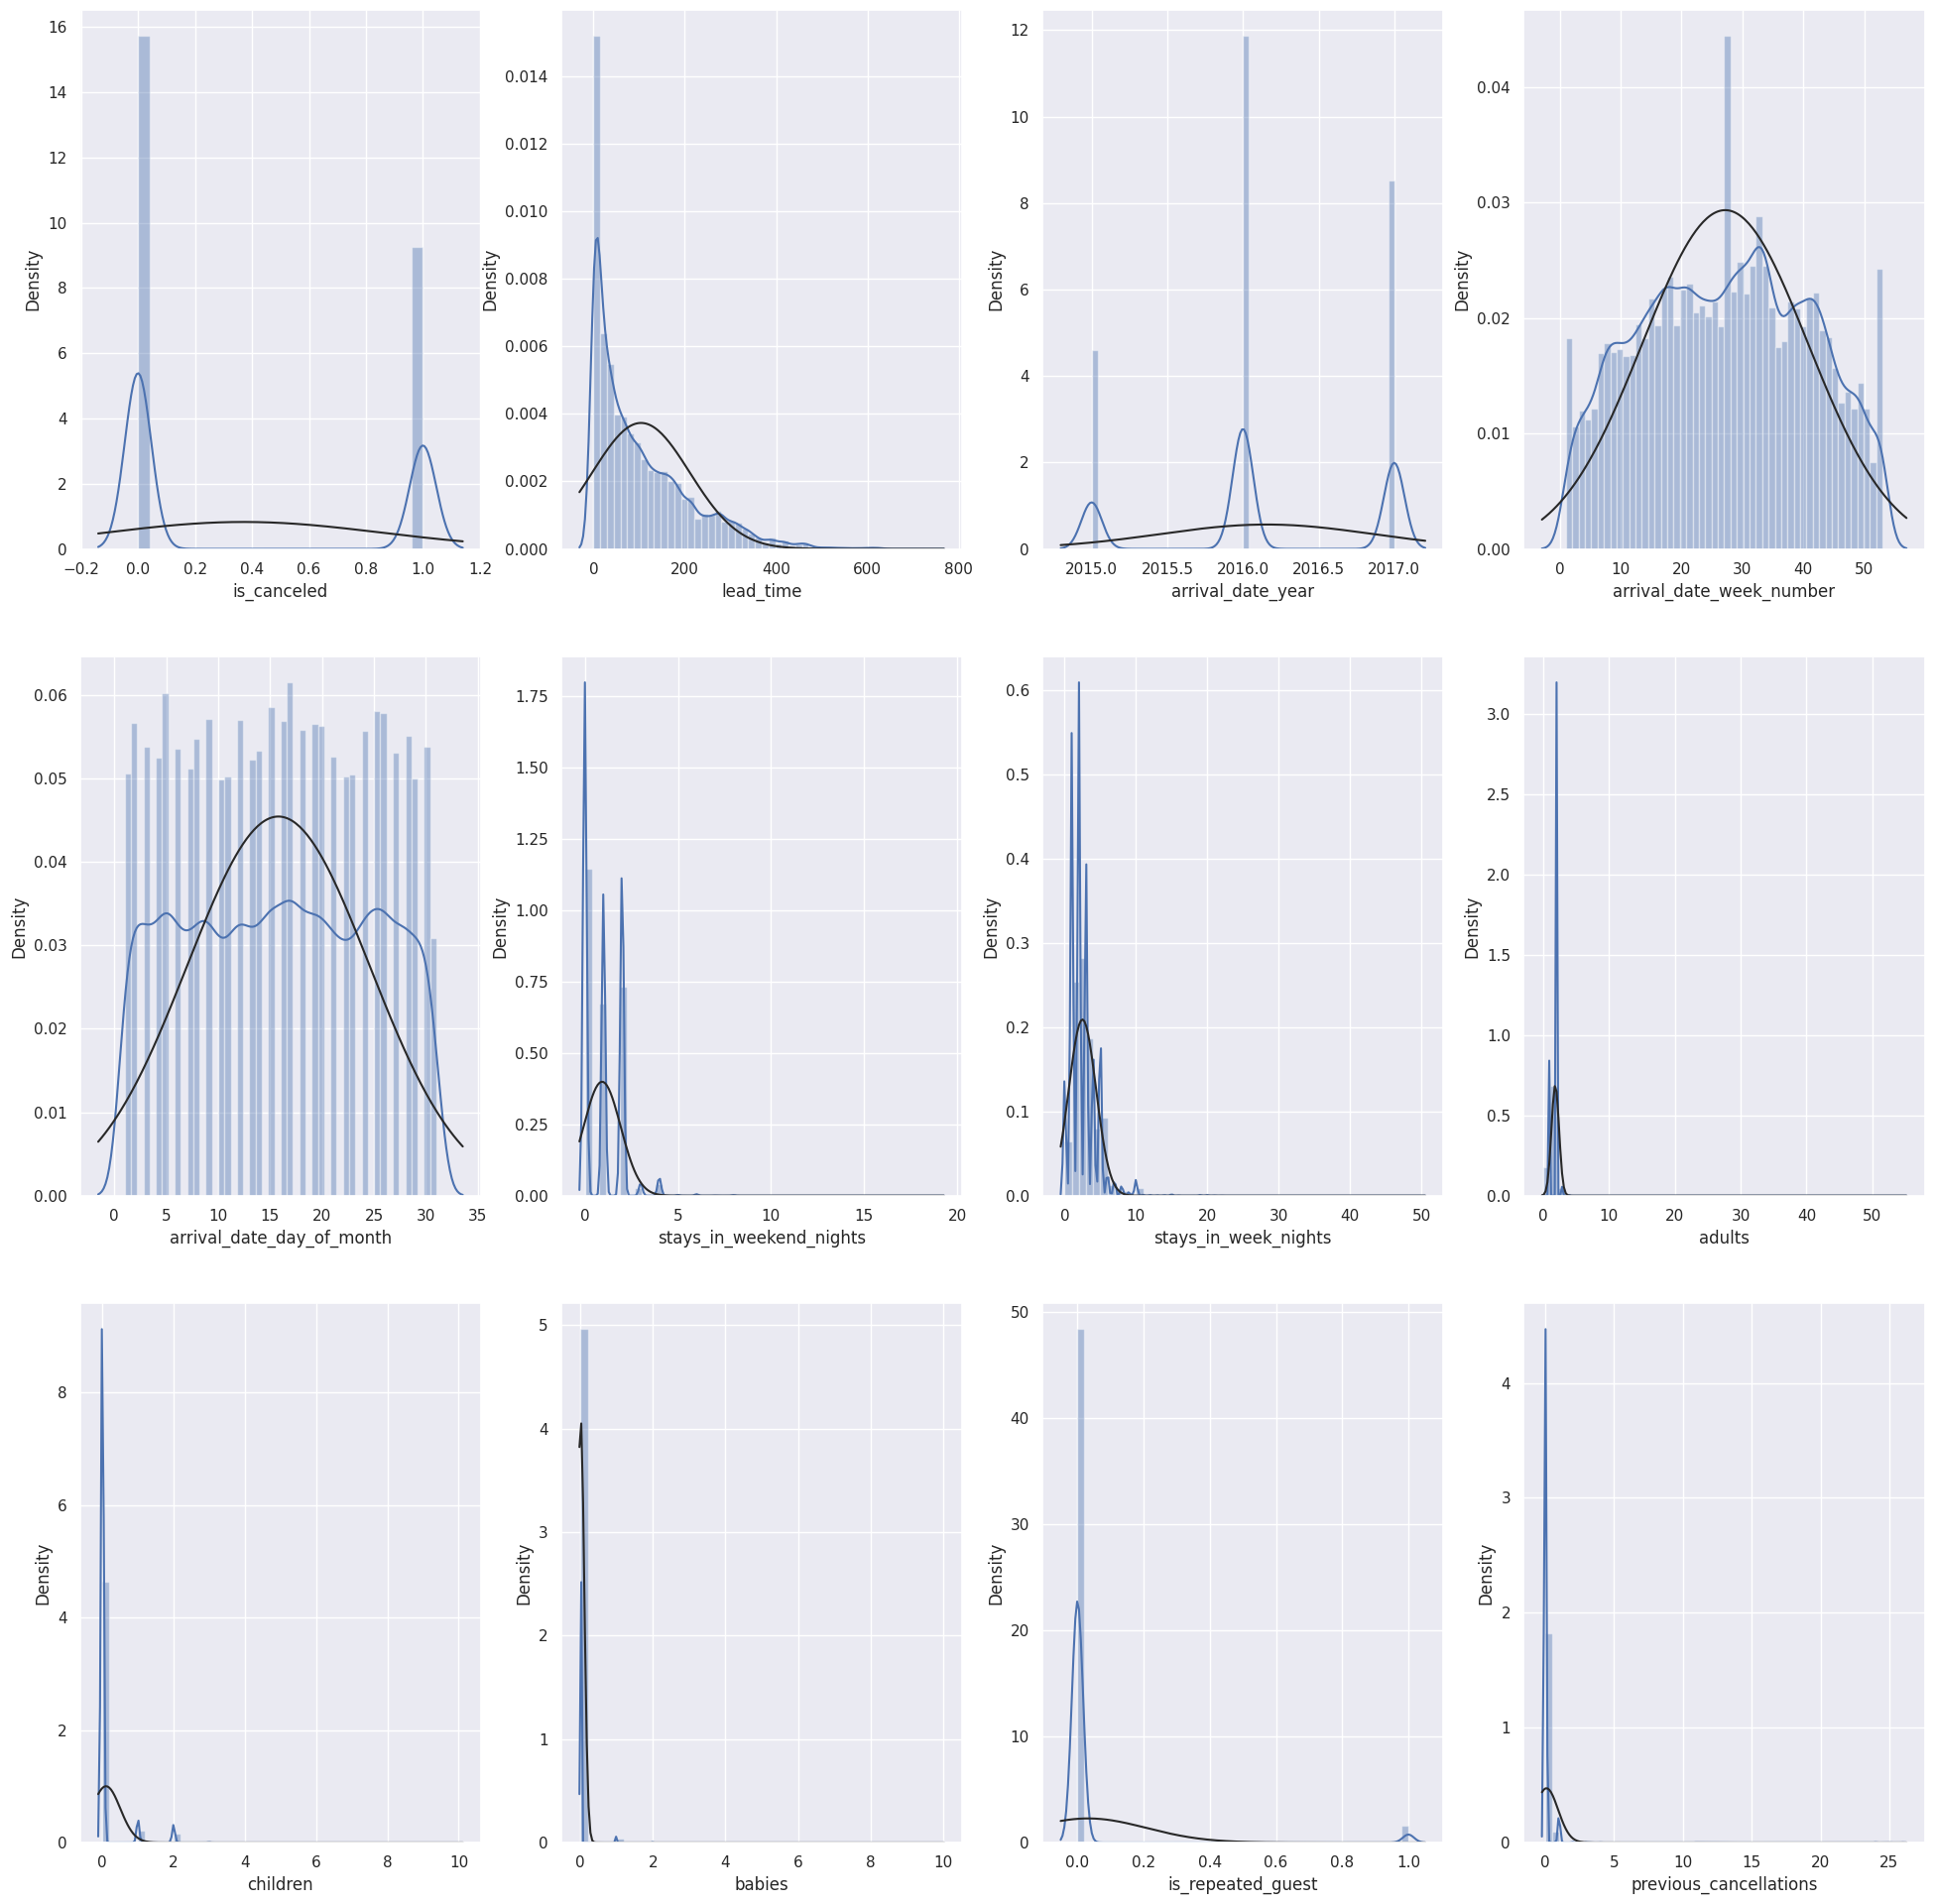

In [60]:
cate = [var for var in df.columns if df[var].dtypes == 'object']
num = [var for var in df.columns if df[var].dtypes != 'object']
from scipy import stats
fig = plt.figure()
#plt.figure(figsize=(120,60))
i = 0
for col in num:
    try:
        ax = fig.add_subplot(3,4,i+1)
        sns.distplot(df[col], kde=True, fit=stats.norm)
    except ValueError:
        print(str(i)+ ' '+ 'ValueError')
    except RuntimeError:
        print(str(i)+ ' '+ 'RuntimeError')
    i = i+1
fig.set_size_inches(24, 24)

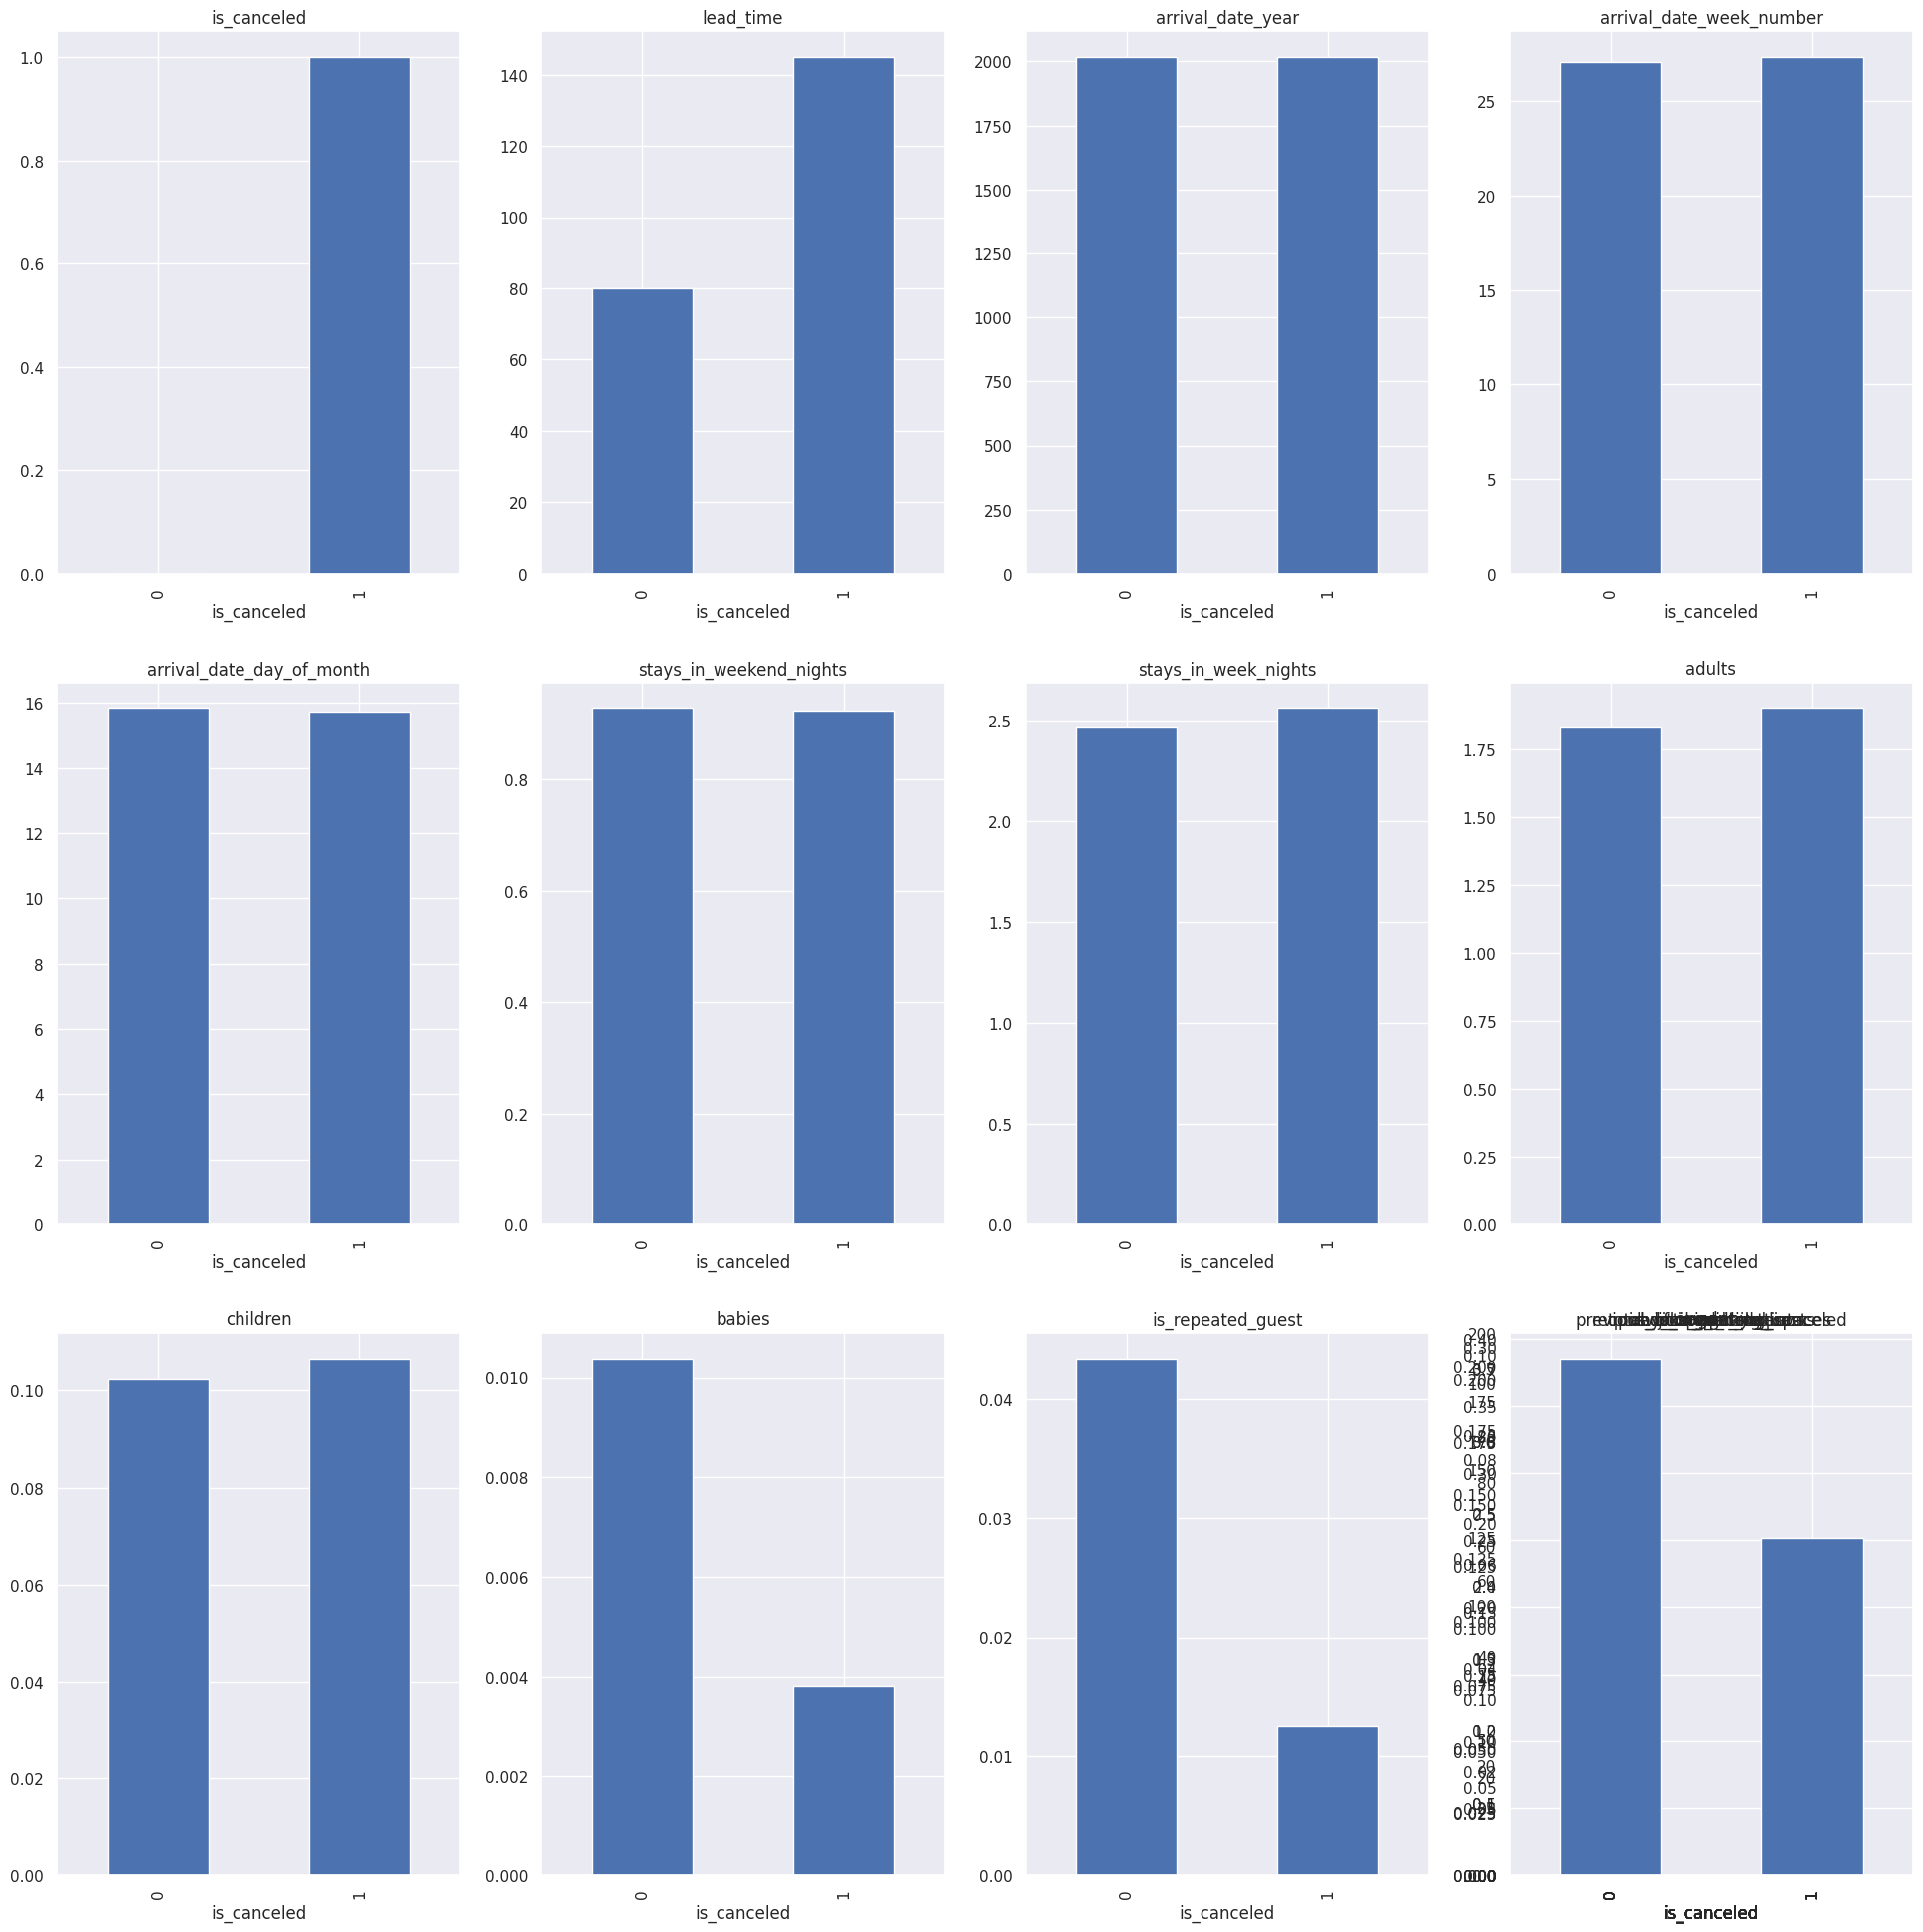

<Figure size 12000x6000 with 0 Axes>

In [64]:
# plots for all numeric variables to Y

fig = plt.figure()
plt.figure(figsize=(120,60))
i = 1
for col in num:
    ax = fig.add_subplot(3, 4, i)
    df.groupby(['is_canceled'])[col].mean().plot(kind = 'bar', ax = ax).set_title(col)
    if i != 12:
      i = i + 1
fig.set_size_inches(24, 24)

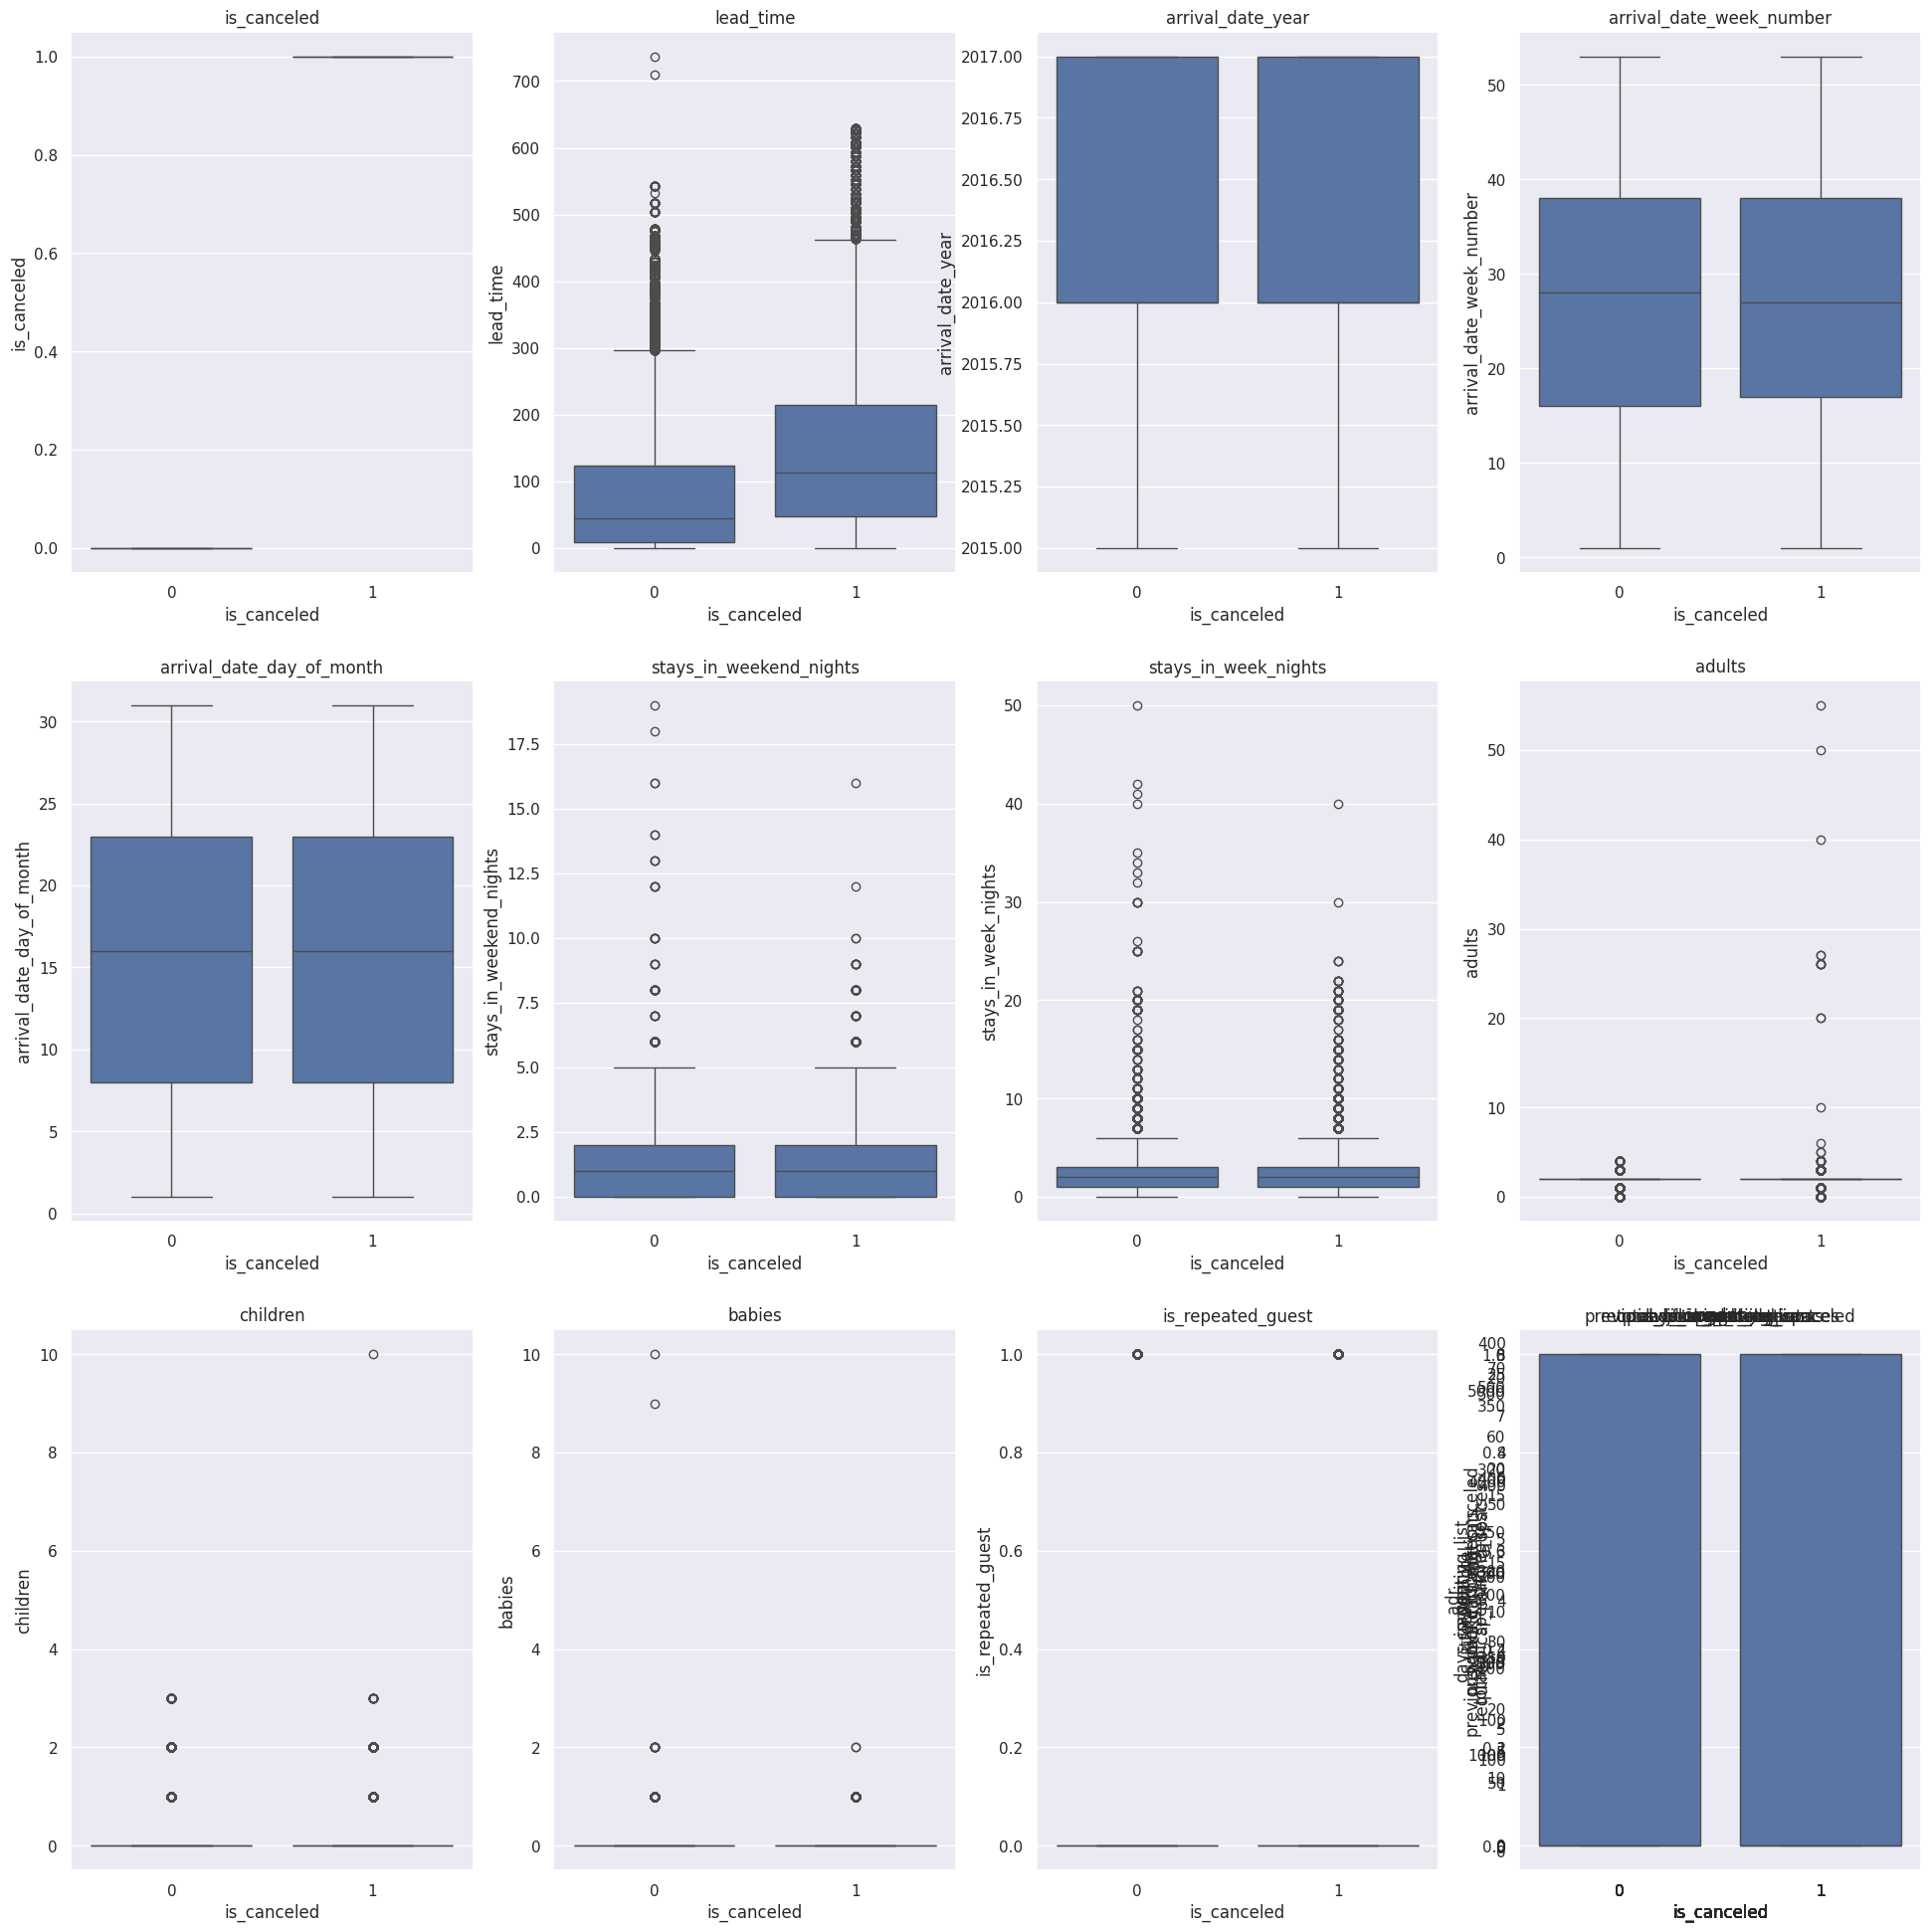

<Figure size 8000x4000 with 0 Axes>

In [70]:
# Boxplots for all numeric variables to Y

fig = plt.figure()
plt.figure(figsize=(80,40))
i = 1
for col in num:
    ax = fig.add_subplot(3,4,i)
    sns.boxplot(x = 'is_canceled', y = col, data = df, ax = ax).set_title(col)
    if i != 12:
      i = i + 1
fig.set_size_inches(24, 24)

Text(0.5, 1.0, 'adr')

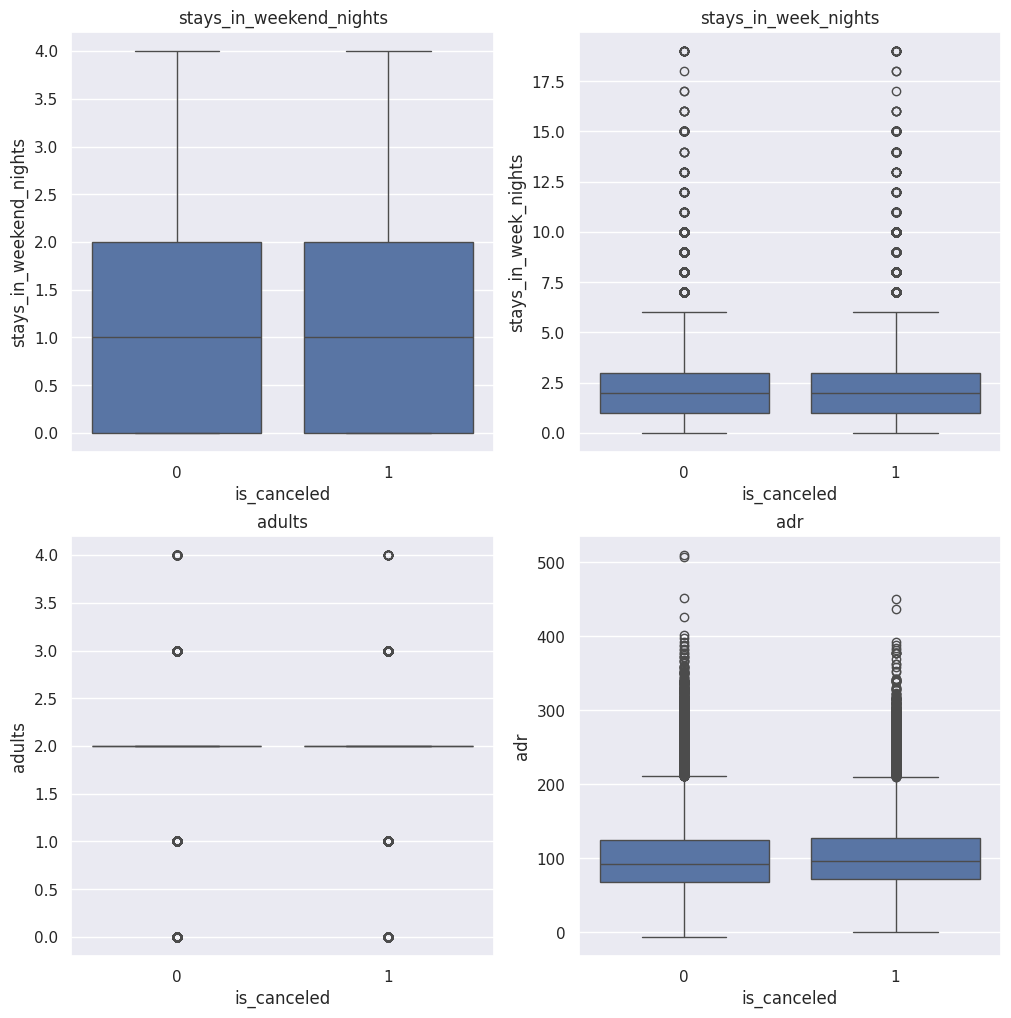

In [72]:
#To better check the longtail data:

fig = plt.figure()
fig.set_size_inches(12, 12)
fig.add_subplot(2,2,1)
sns.boxplot(x = 'is_canceled', y = 'stays_in_weekend_nights', data = df[df['stays_in_weekend_nights']<5]).set_title('stays_in_weekend_nights')
fig.add_subplot(2,2,2)
sns.boxplot(x = 'is_canceled', y = 'stays_in_week_nights', data = df[df['stays_in_weekend_nights']<7]).set_title('stays_in_week_nights')
fig.add_subplot(2,2,3)
sns.boxplot(x = 'is_canceled', y = 'adults', data = df[df['adults']<5]).set_title('adults')
fig.add_subplot(2,2,4)
sns.boxplot(x = 'is_canceled', y = 'adr', data = df[df['adr']<5000]).set_title('adr')

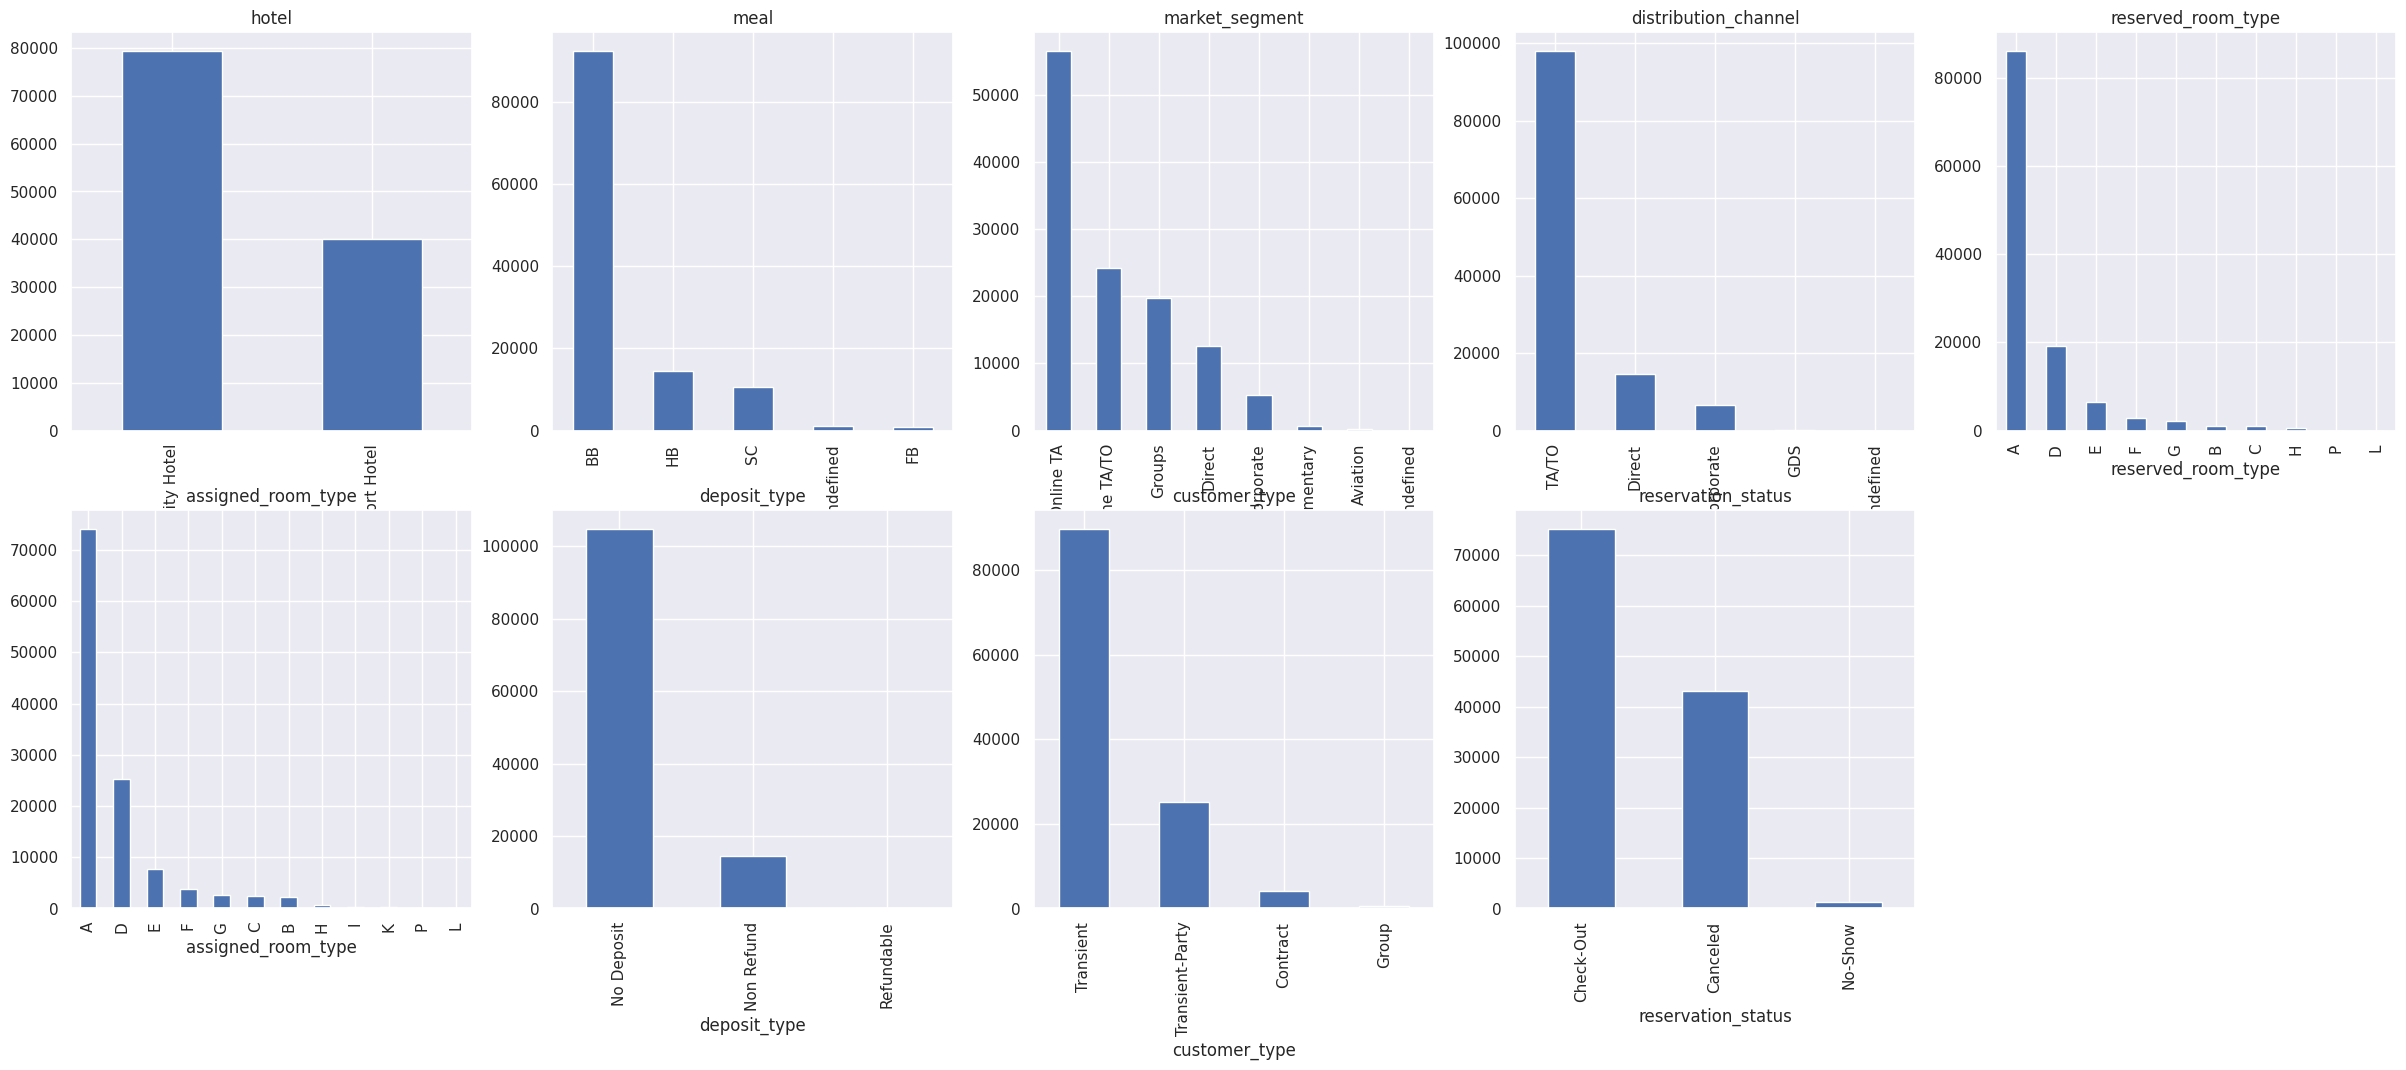

In [73]:
# plots for all categorical variables

fig = plt.figure()
i = 0
for col in cate:
    if col == 'country' or col == 'reservation_status_date' or col == 'arrival_date_day_of_month' or col == 'arrival_date_month' or col == 'arrival_date_year':
        pass
    else:
        ax = fig.add_subplot(5,5,i+1)
        df[col].value_counts().plot(kind = 'bar', ax = ax).set_title(col)
        i = i+1
fig.set_size_inches(30, 30)

In [75]:
def stack2dim(raw, i, j, rotation = 0, location = 'upper left'):
    import math
    data_raw = pd.crosstab(raw[i], raw[j])
    data = data_raw.div(data_raw.sum(1), axis=0)

    createVar = locals()
    x = [0]
    width = []
    k = 0
    for n in range(len(data)):

        createVar['width' + str(n)] = data_raw.sum(axis=1)[n] / sum(data_raw.sum(axis=1))
        width.append(createVar['width' + str(n)])
        if n == 0:
            continue
        else:
            k += createVar['width' + str(n - 1)] / 2 + createVar['width' + str(n)] / 2 + 0.05
            x.append(k)

    y_mat = []
    n = 0
    for p in range(data.shape[0]):
        for q in range(data.shape[1]):
            n += 1
            y_mat.append(data.iloc[p, q])
            if n == data.shape[0] * 2:
                break
            elif n % 2 == 1:
                y_mat.extend([0] * (len(data) - 1))
            elif n % 2 == 0:
                y_mat.extend([0] * len(data))

    y_mat = np.array(y_mat).reshape(len(data) * 2, len(data))
    y_mat = pd.DataFrame(y_mat)

    createVar = locals()
    for row in range(len(y_mat)):
        createVar['a' + str(row)] = y_mat.iloc[row, :]
        if row % 2 == 0:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], label='0', color='#5F9EA0')
            else:
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], color='#5F9EA0')
        elif row % 2 == 1:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], label='1', color='#8FBC8F')
            else:
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], color='#8FBC8F')

    plt.title(j + ' vs ' + i)
    group_labels = [str(name) for name in data.index]
    plt.xticks(x, group_labels, rotation = rotation)
    plt.ylabel(j)
    plt.legend(shadow=True, loc=location)
    plt.show()

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



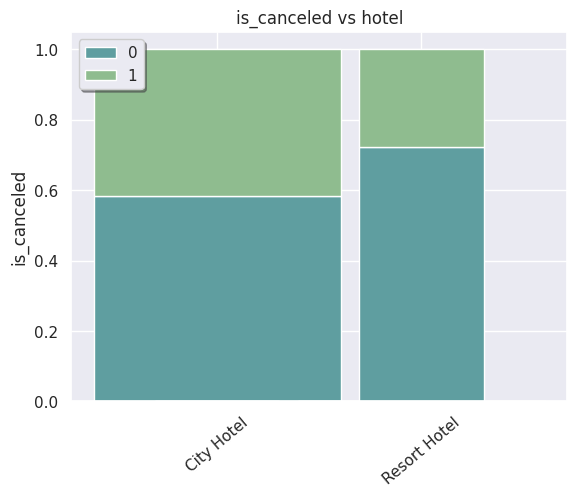

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

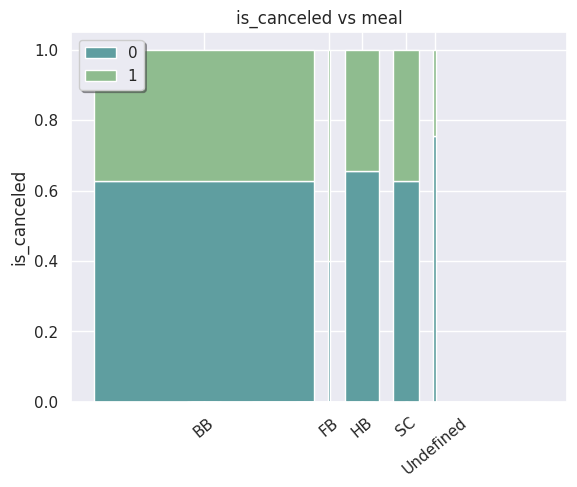

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

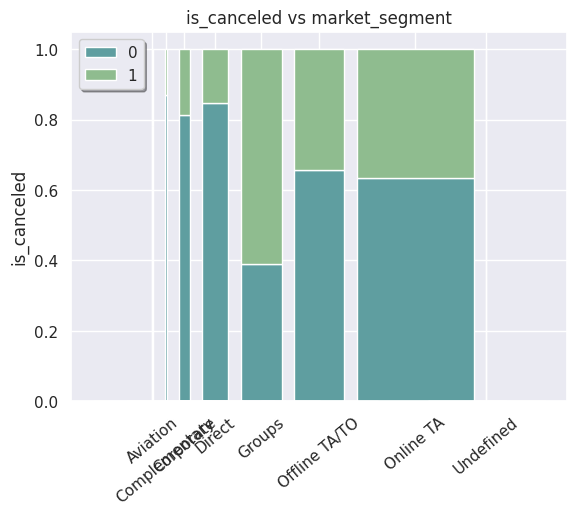

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

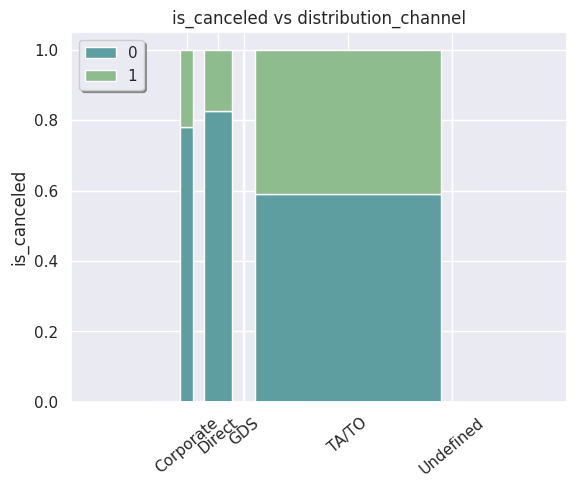

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

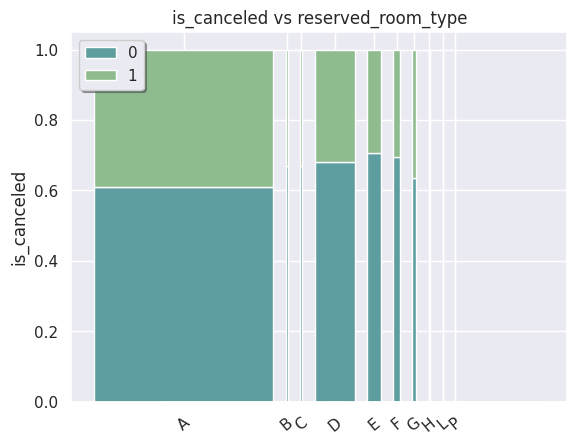

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

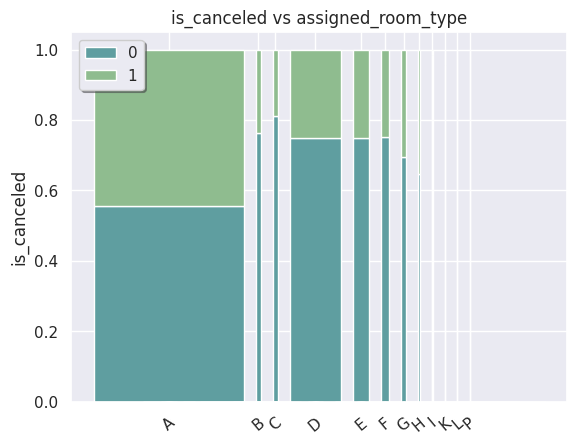

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



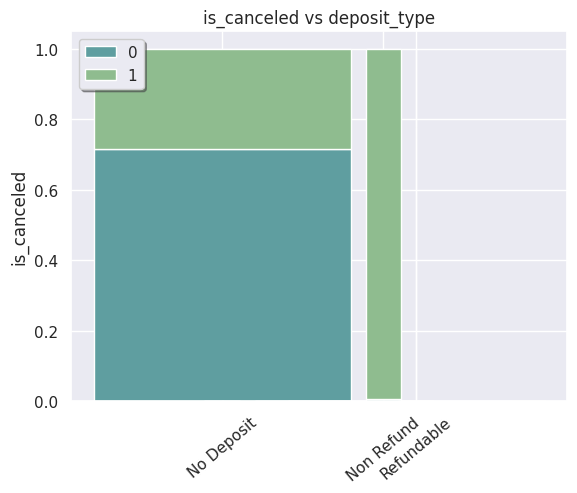

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

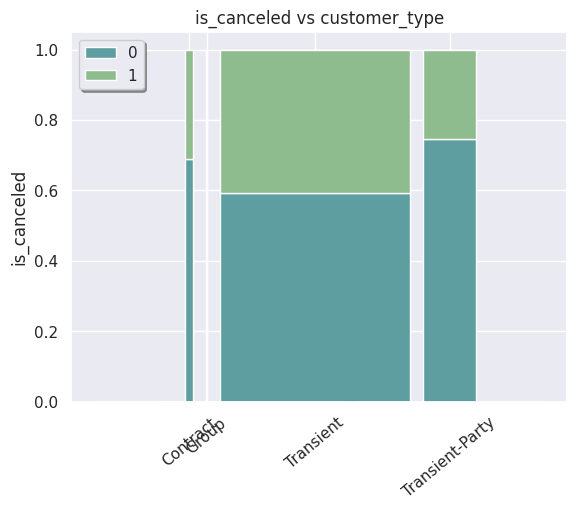

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-75-b88d60fccb19>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



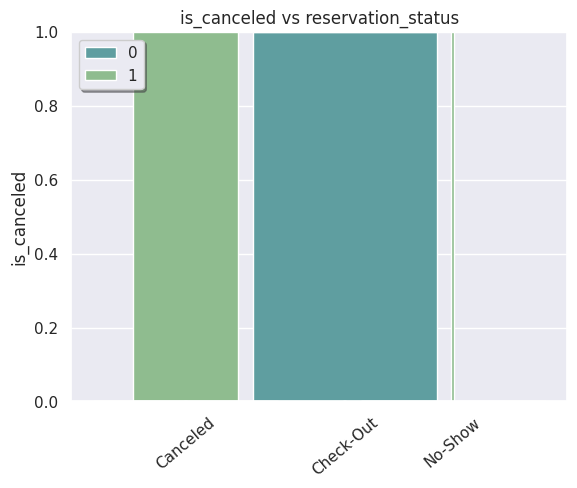

In [76]:
# Plots for all categorical variables to Y

fig = plt.figure()
#plt.figure(figsize=(140,60))
for col in cate:
    if col == 'country' or col == 'reservation_status_date' or col == 'arrival_date_day_of_month' or col == 'arrival_date_month' or col == 'arrival_date_year':
        pass
    else:
        stack2dim(df, i=col, j="is_canceled", rotation = 40)
fig.set_size_inches(30, 30)

<Axes: xlabel='month'>

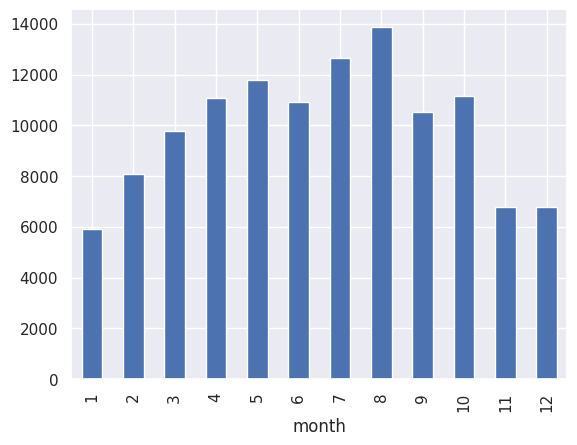

<Axes: xlabel='month'>

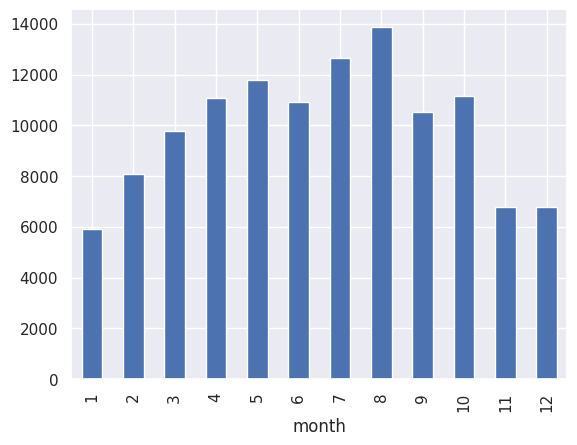

In [83]:
# Time series. It contains 3 years of data and we wonder if each year/month has some differences or strange outliers.

df['date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)
df['date'] = pd.to_datetime(df['date'],  errors = 'coerce')
import datetime as dt
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.month.value_counts().sort_index().plot(kind="bar")

<Axes: >

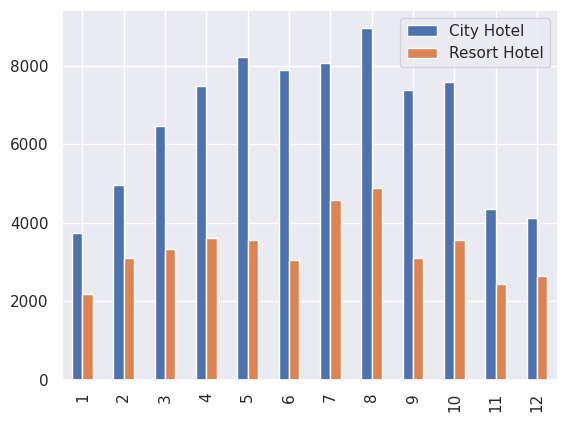

In [84]:
# What's the difference between city hotel and resort hotel?

pd.DataFrame(zip(list(df[df['hotel'] == 'City Hotel'].month.value_counts().sort_index()),list(df[df['hotel'] == 'Resort Hotel'].month.value_counts().sort_index())),
            columns=['City Hotel', 'Resort Hotel'], index = [1,2,3,4,5,6,7,8,9,10,11,12]).plot(kind="bar")

<Axes: xlabel='year'>

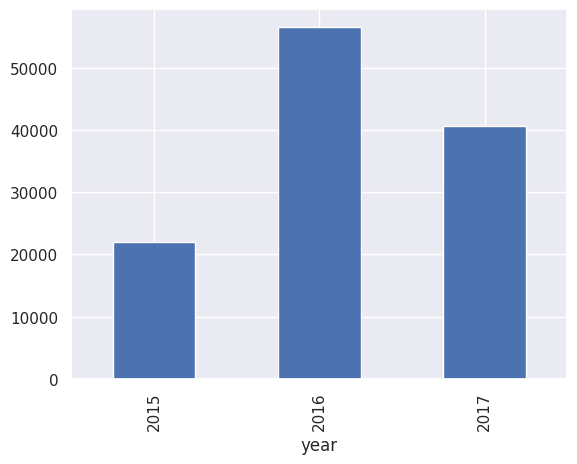

In [86]:
df.year.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='month'>

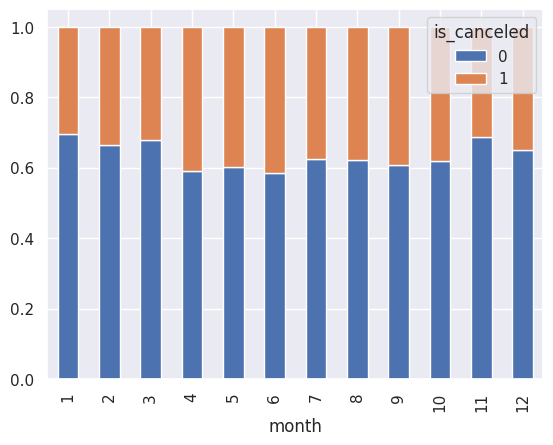

In [87]:
cross_table = pd.crosstab(df['month'],df['is_canceled'])
cross_table.div(cross_table.sum(1), axis = 0).plot(kind = 'bar', stacked = True)

In [95]:
roomtype = df.groupby(['reserved_room_type','assigned_room_type','is_canceled'], as_index=False)['adr'].agg(['count', 'mean']).reset_index()
roomtype.T
fig = plt.figure(figsize=(30,10))

<Figure size 3000x1000 with 0 Axes>

<Axes: xlabel='reserved_room_type', ylabel='adr'>

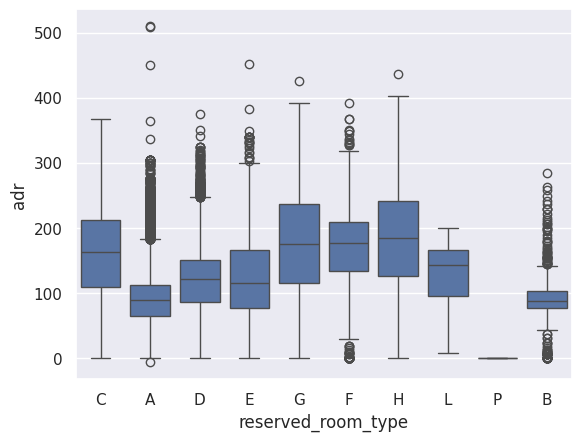

In [96]:
sns.boxplot(x = 'reserved_room_type', y = 'adr' ,  data = df[df['adr']<4000])


<Axes: xlabel='assigned_room_type', ylabel='adr'>

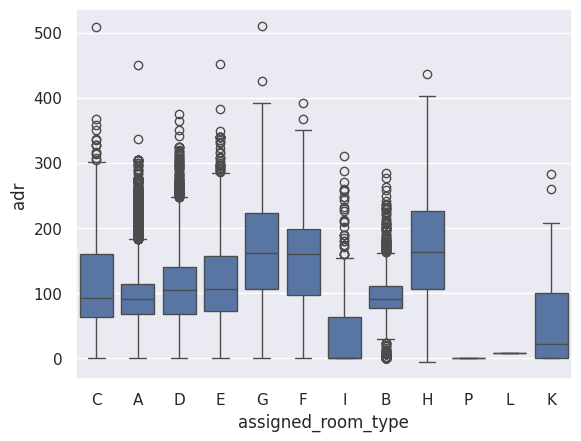

In [98]:
sns.boxplot(x = 'assigned_room_type', y = 'adr' ,  data = df[df['adr']<4000])

In [103]:
# And finally just for fun. We always wondered when is the best time to book the reservation.
# adr divided by total customer number, we get one night rate per person.

rate = df[['hotel','adults','children','babies','assigned_room_type','adr','month','is_canceled']]
rate['rate_p'] = rate['adr']/(rate['adults']+ rate['children'].astype(float)+ rate['babies'].astype(float))
rate.rate_p.describe()

<ipython-input-103-85317785761b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rate_p
count,119237.00
mean,inf
std,NaN
min,-3.19
25%,37.40
50%,49.50
75%,66.00
max,inf


In [104]:
rate['rate'] = [x if x <3000 else 0 for x in rate['rate_p'] ]
rate.rate.describe()

<ipython-input-104-17ce7815d9ff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rate
count,119390.000000
mean,54.905577
std,29.115854
min,-3.190000
25%,37.400000
50%,49.500000
75%,65.996250
max,2700.000000


<ipython-input-106-355746ae23b5>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




<Axes: xlabel='month', ylabel='rate'>

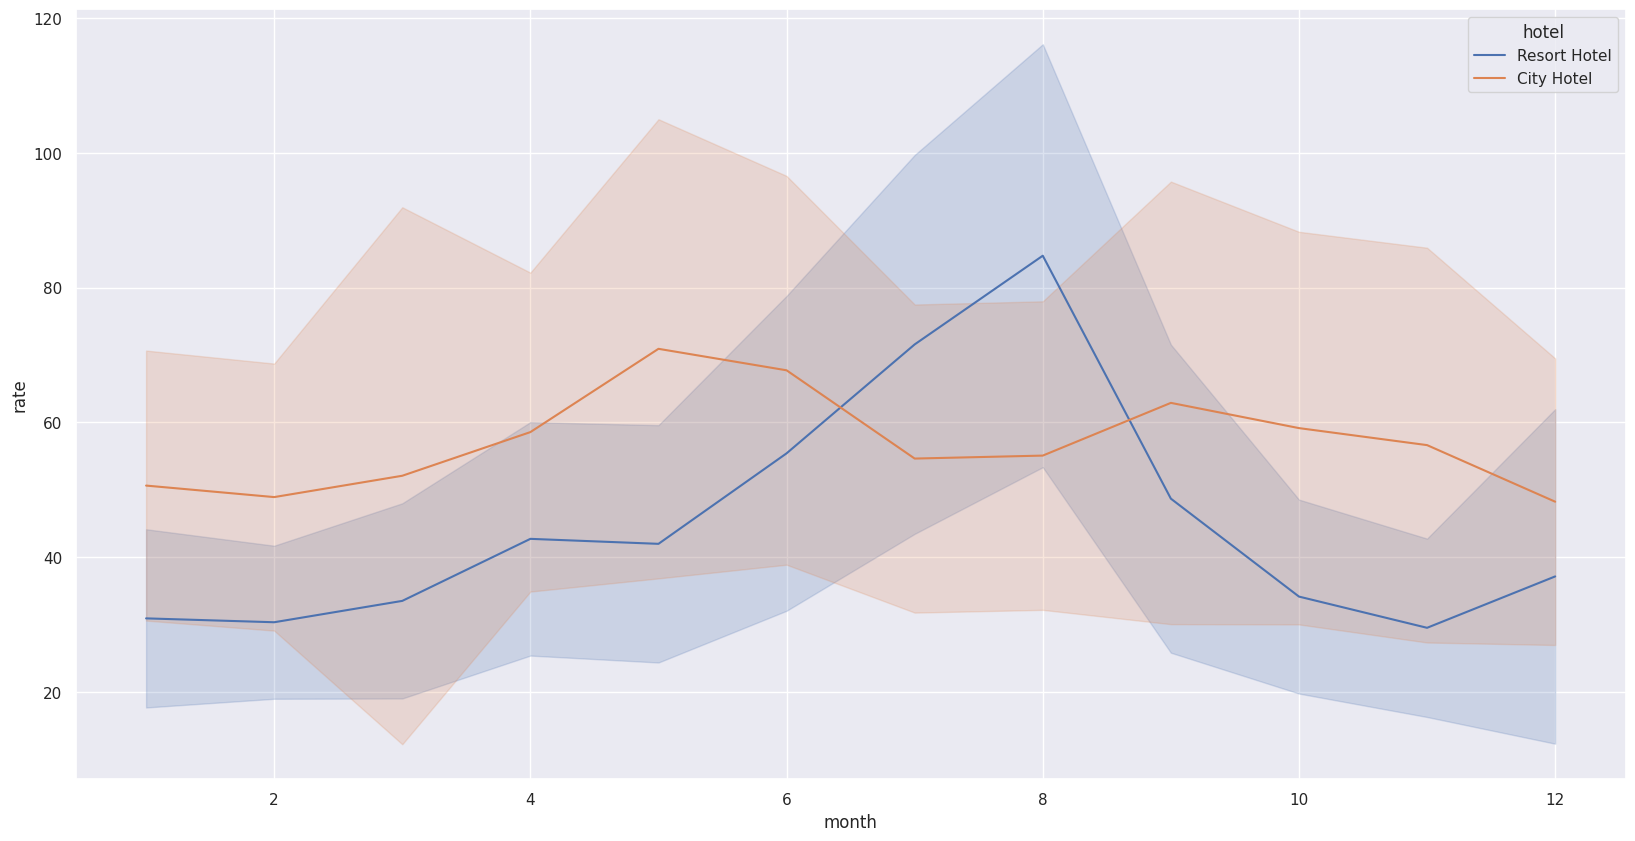

In [106]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='month', y='rate', hue='hotel', data=rate, ci='sd')

Text(0.5, 1.0, 'rate')

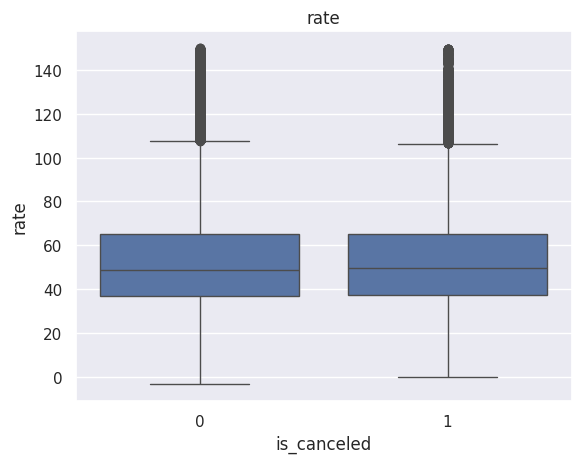

In [107]:
sns.boxplot(x = 'is_canceled', y = 'rate', data = rate[rate['rate']<150]).set_title('rate')